In [1]:
import os
import numpy as np
from matplotlib import pyplot
from scipy import optimize
from scipy.io import loadmat

%matplotlib inline

In [15]:
# input data to X,y
# data form: X(5000,400),y(5000,)
# 10 labels, from 1 to 10 (note that we have mapped "0" to label 10)
num_labels = 10

# training data stored in arrays X, y
# every row of X is a training sample
path = 'C:\\Users\\39410\\Desktop\\大创项目\\吴恩达机器学习算法数据\\machine-learning-ex3\\ex3\\ex3data1.mat'
data = loadmat(path)
X, y = data['X'], data['y'].ravel()

# set the zero digit to 0, rather than its mapped 10 in this dataset
# This is an artifact due to the fact that this dataset was used in 
# MATLAB where there is no index 0
y[y == 10] = 0

# number of samples
m = y.size

In [3]:
def sigmoid(z):
    """
    Computes the sigmoid of z.
    """
    return 1.0 / (1.0 + np.exp(-z))

In [4]:
def lrCostFunction(theta, X, y, lambda_):
    #此处的X和theta是可以向量化的形式，即X[0] = 1,theta和X都是n+1维
    #Initialize some useful values
    m = y.size

    # convert labels to ints if their type is bool
    if y.dtype == bool:
        y = y.astype(int)  #将多分类器改造为二分类器

    # You need to return the following variables correctly
    J = 0
    grad = np.zeros(theta.shape)
    h = sigmoid(np.dot(X, theta))
    temp = theta
    temp[0] = 0  #不对theta0正则化 # 此时theta[0]也被赋值为0

    J = ((np.dot(y, np.log(h))) + np.dot((1 - y), np.log(1 - h))) / (-m)
    J += (lambda_ / (2 * m)) * np.sum(temp[1:]**2)

    X_t = np.transpose(X)
    grad = np.dot(X_t, h - y) / m
    grad += (lambda_ / m) * temp

    return J, grad

In [18]:
# # test values:theta_t,X_t,y_t,lambda_t
# # test values for the parameters theta
# theta_t = np.array([-2, -1, 1, 2], dtype=float)

# # test values for the inputs
# X_t = np.concatenate([np.ones((5, 1)), np.arange(1, 16).reshape(5, 3, order='F')/10.0], axis=1)

# # test values for the labels
# y_t = np.array([1, 0, 1, 0, 1])

# # test value for the regularization parameter
# lambda_t = 3

In [17]:
# # test lrCostFunction
# # theta = np.zeros(400)
# J, grad = lrCostFunction(theta_t, X_t, y_t, lambda_t)

# print('Cost         : {:.6f}'.format(J))
# print('Expected cost: 2.534819')
# print('-----------------------')
# print('Gradients:')
# print(' [{:.6f}, {:.6f}, {:.6f}, {:.6f}]'.format(*grad))
# print('Expected gradients:')
# print(' [0.146561, -0.548558, 0.724722, 1.398003]');

In [28]:
def oneVsAll(X, y, num_labels, lambda_):
    m, n = X.shape
    all_theta = np.zeros((num_labels, n + 1))
    X = np.concatenate([np.ones((m, 1)), X], axis=1)
    
    initial_theta = np.zeros(n + 1)
    options = {'maxiter': 100}
    for c in range(num_labels):
        res = optimize.minimize(
            lrCostFunction,  #fun
            initial_theta,  # 传入fun的第一个参数
            (X, (y==c), lambda_),  #传入fun的第二、三、四个参数 
            jac=True,  # 表示fun返回J和J的偏导
            method='BFGS',# 优化方法
            options=options)  #表示最大迭代次数50次
        #此时的res.x 表示优化后的theta，res.fun表示cost
        all_theta[c] = res.x
        print("cost = " + str(res.fun))
    #返回每一个分类器的最优参数
    # all_theta.shape = (10,401)
    return all_theta

In [26]:
#call oneVsAll initial lambda_,all_theta
lambda_ = 0.3
all_theta = oneVsAll(X, y, num_labels, lambda_)
print(all_theta.shape)

0.014256854701948351
0.02008050603819196
0.061315507805637375
0.06637715999382666
0.04361880495435977
0.06729450531997413
0.027795878627094685
0.03965599479545483
0.08683760475397757
0.08147271895363528
(10, 401)


In [29]:
def predictOneVsAll(all_theta, X):
    m = X.shape[0]
    num_labels = all_theta.shape[0]
    p = np.zeros(m)
    X = np.concatenate([np.ones((m, 1)), X], axis=1)
    temp = np.zeros(num_labels)
    
    for i in range(m):
        p[i] = np.argmax(sigmoid(np.dot(all_theta,X[i])))
    
    # 返回所有样本的预测值
    return p

In [10]:
# call predictOneVsAll
pred = predictOneVsAll(all_theta, X)
print('Training Set Accuracy: {:.2f}%'.format(np.mean(pred == y) * 100))

Training Set Accuracy: 94.84%


In [11]:
# BLOCK OF TEST PYTHON
x1 = np.arange(1, 7).reshape((2, 3))
x2 = np.arange(3)
print(x1)
print(x2)
print(np.dot(x1,x2))

[[1 2 3]
 [4 5 6]]
[0 1 2]
[ 8 17]


# Visualizing the data 

In [12]:
def displayData(X, example_width=None, figsize=(10, 10)):
    """
    Displays 2D data stored in X in a nice grid.
    """
    # Compute rows, cols
    if X.ndim == 2:
        m, n = X.shape
    elif X.ndim == 1:
        n = X.size
        m = 1
        X = X[None]  # Promote to a 2 dimensional array
    else:
        raise IndexError('Input X should be 1 or 2 dimensional.')

    example_width = example_width or int(np.round(np.sqrt(n)))
    example_height = n / example_width

    # Compute number of items to display
    display_rows = int(np.floor(np.sqrt(m)))
    display_cols = int(np.ceil(m / display_rows))

    fig, ax_array = pyplot.subplots(display_rows, display_cols, figsize=figsize)
    fig.subplots_adjust(wspace=0.025, hspace=0.025)

    ax_array = [ax_array] if m == 1 else ax_array.ravel()

    for i, ax in enumerate(ax_array):
        ax.imshow(X[i].reshape(example_width, example_width, order='F'),
                  cmap='Greys', extent=[0, 1, 0, 1])
        ax.axis('off')


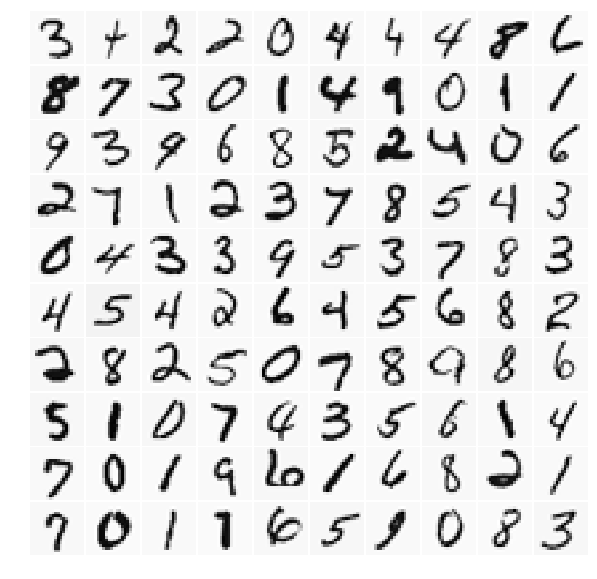

In [13]:
# Randomly select 100 data points to display
rand_indices = np.random.choice(m, 100, replace=False)
sel = X[rand_indices, :]

displayData(sel)